In [47]:
# 🔥 Calories Burnt Prediction using Machine Learning

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, StandardScaler
from sklearn.compose import ColumnTransformer

In [49]:
#Step 2: import data
calories_df = pd.read_csv('../data/calories.csv')

exercises_df = pd.read_csv('../data/exercises.csv')

#Combining the two dataframes
df = pd.concat([exercises_df, calories_df['Calories']], axis=1)
df.head()

#checking the number of rows and columns
df.shape

#getting some information from the data
# df.info()


(15000, 9)

In [51]:
# Step 3: Preprocess Data
# Encode Gender
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

# Check for nulls
print(df.isnull().sum())

# Basic stats
# df.describe()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64


In [4]:
# Step 4: Visualize Correlations
# plt.figure(figsize=(10,6))
# sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
# plt.title('Feature Correlation Heatmap')
# plt.show()

In [53]:
# Step 5: Prepare Features and Target
X = df[['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']]
y = df['Calories']

In [55]:
# Step 6: Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# Step 7: Scale features and predict values using training and test data

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   # fit on train
X_test_scaled  = scaler.transform(X_test)        # transform test

model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict 
y_train_pred = model.predict(X_train_scaled)

# Predict
y_pred = model.predict(X_test_scaled)


print("Coefficient ", dict(zip(X.columns, np.round(model.coef_,4))))
print("Intercept ", np.round(model.intercept_))


Coefficient  {'Age': 8.5763, 'Height': -1.995, 'Weight': 3.3516, 'Duration': 55.0305, 'Heart_Rate': 18.9871, 'Body_Temp': -13.1801}
Intercept  89.0


Train R² Score:  [0.9671, 0.9948, 0.9964, 0.9969, 0.9972, 0.9974]
Test R² Score:  [0.9673, 0.9951, 0.9966, 0.997, 0.9972, 0.9967]
Train MSE:  [127.1152, 20.0034, 13.9729, 12.0629, 10.8911, 10.104]
Test MSE:  [132.0268, 19.9734, 13.5712, 11.9305, 11.4364, 13.3481]


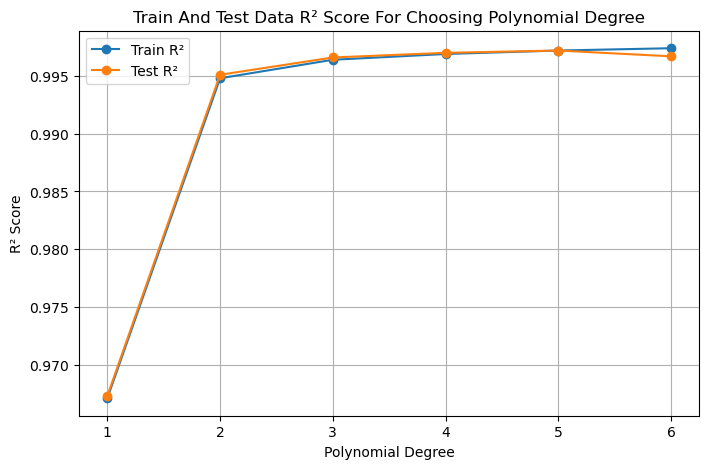

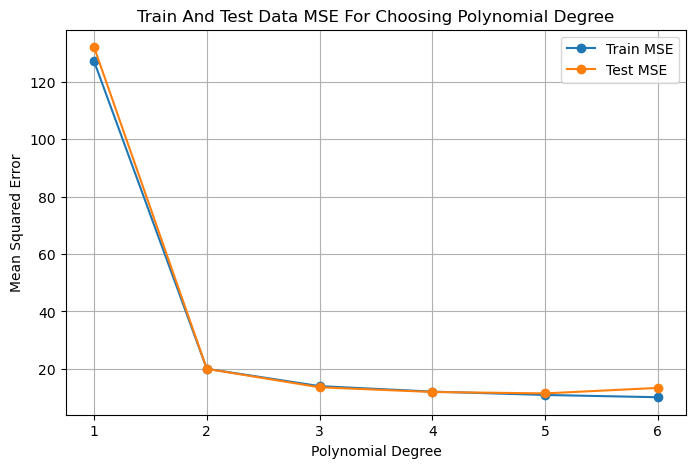

In [61]:
# Step 8: Evaluate the Model of Multiple Polynomial Regression 
degrees = range(1, 7) 

train_r2 = []
test_r2 = []
train_mse = []
test_mse = []
for d in degrees:
    poly = PolynomialFeatures(degree=d, include_bias=False)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)
    
    model_poly = LinearRegression()
    model_poly.fit(X_train_poly, y_train)

    y_train_pred_poly = model_poly.predict(X_train_poly)
    y_pred_poly = model_poly.predict(X_test_poly)
    
     # # Metrics
    train_r2.append(np.round(r2_score(y_train, y_train_pred_poly),4))
    test_r2.append(np.round(r2_score(y_test, y_pred_poly),4))
    train_mse.append(np.round(mean_squared_error(y_train, y_train_pred_poly),4))
    test_mse.append(np.round(mean_squared_error(y_test, y_pred_poly),4))
    

print('Train R² Score: ',train_r2)
print('Test R² Score: ',test_r2)
print('Train MSE: ',train_mse)
print('Test MSE: ',test_mse)

# # Plot R² vs Degree
plt.figure(figsize=(8, 5))
plt.plot(degrees, train_r2, label='Train R²', marker='o')
plt.plot(degrees, test_r2, label='Test R²', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.title('Train And Test Data R² Score For Choosing Polynomial Degree')
plt.legend()
plt.grid(True)
plt.show()

# # Plot MSE vs Degree (optional)
plt.figure(figsize=(8, 5))
plt.plot(degrees, train_mse, label='Train MSE', marker='o')
plt.plot(degrees, test_mse, label='Test MSE', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Train And Test Data MSE For Choosing Polynomial Degree')
plt.legend()
plt.grid(True)
plt.show()
